In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx

--2022-08-31 11:17:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32717 (32K) [application/x-httpd-php]
Saving to: ‘Real estate valuation data set.xlsx’

Real estate valuati 100%[===================>]  31.95K  --.-KB/s    in 0.06s   

2022-08-31 11:17:18 (496 KB/s) - ‘Real estate valuation data set.xlsx’ saved [32717/32717]



In [3]:
df = pd.read_excel('Real estate valuation data set.xlsx')
df.rename(columns = {'X1 transaction date':'x1','X2 house age':'x2', 
                     'X3 distance to the nearest MRT station':'x3',
                     'X4 number of convenience stores':'x4',
                     'X5 latitude':'x5','X6 longitude':'x6',
                     'Y house price of unit area':'y' }, inplace = True)
df.head()

,No,x1,x2,x3,x4,x5,x6,y
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.shape

(414, 8)

Check the missing or null values

In [5]:
df.isnull().sum()

No    0
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
y     0
dtype: int64

**Split the transacion date  into month and year and drop the transaction date column**

In [6]:

df[['Year', 'Month']] = df['x1'].astype(str).str.split('.', 1, expand=True)


df.head()


,No,x1,x2,x3,x4,x5,x6,y,Year,Month
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,2012,9166667
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,2012,9166667
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,2013,5833333
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,2013,5
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,2012,8333333


In [7]:
df.drop(['x1'],axis=1,inplace=True)


In [8]:
df.head()

,No,x2,x3,x4,x5,x6,y,Year,Month
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,2012,9166667
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,2012,9166667
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,2013,5833333
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,2013,5
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,2012,8333333


In [9]:
df[['Year', 'Month']] = df[['Year', 'Month']].astype('float64')

In [10]:
df.describe()

,No,x2,x3,x4,x5,x6,y,Year,Month
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,4.140000e+02
mean,207.500000,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193,2012.695652,3.283019e+06
std,119.655756,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488,0.460687,3.275184e+06
min,1.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,2012.000000,0.000000e+00
25%,104.250000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,2012.000000,2.500000e+01
50%,207.500000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,2013.000000,3.333333e+06
75%,310.750000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,2013.000000,5.833333e+06
max,414.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,2013.000000,9.166667e+06


In [11]:
df.columns


Index(['No', 'x2', 'x3', 'x4', 'x5', 'x6', 'y', 'Year', 'Month'], dtype='object')

In [12]:
final_dataset = df[[ 'x2', 'x3', 'x4', 'x5', 'x6','Year', 'Month',
       'y']]
     
final_dataset.head()     

,x2,x3,x4,x5,x6,Year,Month,y
0,32.0,84.87882,10,24.98298,121.54024,2012.0,9166667.0,37.9
1,19.5,306.59470,9,24.98034,121.53951,2012.0,9166667.0,42.2
2,13.3,561.98450,5,24.98746,121.54391,2013.0,5833333.0,47.3
3,13.3,561.98450,5,24.98746,121.54391,2013.0,5.0,54.8
4,5.0,390.56840,5,24.97937,121.54245,2012.0,8333333.0,43.1


Show the correlation between attributes

In [13]:
final_dataset.corr()

,x2,x3,x4,x5,x6,Year,Month,y
x2,1.000000,0.025622,0.049593,0.054420,-0.048520,0.049171,-0.004888,-0.210567
x3,0.025622,1.000000,-0.602519,-0.591067,-0.806317,0.016519,-0.028567,-0.673613
x4,0.049593,-0.602519,1.000000,0.444143,0.449099,-0.005586,0.055918,0.571005
x5,0.054420,-0.591067,0.444143,1.000000,0.412924,0.008118,0.055805,0.546307
x6,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.013177,-0.018641,0.523287
Year,0.049171,0.016519,-0.005586,0.008118,0.013177,1.000000,-0.630681,0.081545
Month,-0.004888,-0.028567,0.055918,0.055805,-0.018641,-0.630681,1.000000,-0.029123
y,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.081545,-0.029123,1.000000


In [14]:
final_dataset.columns

Index(['x2', 'x3', 'x4', 'x5', 'x6', 'Year', 'Month', 'y'], dtype='object')

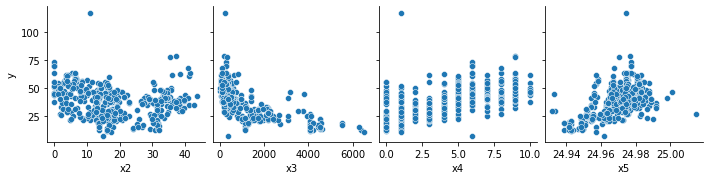

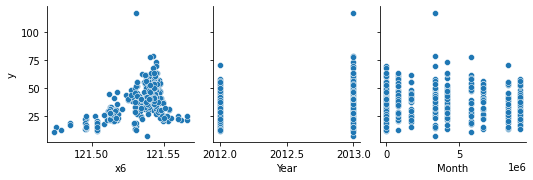

In [15]:
sns.pairplot(data=final_dataset,
             y_vars=['y'],
             x_vars=[ 'x2', 'x3', 'x4', 'x5'
       ])
sns.pairplot(data=final_dataset,
             y_vars=['y'],
             x_vars=[  'x6','Year', 'Month',
       ])

In [16]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

Plot Heat map

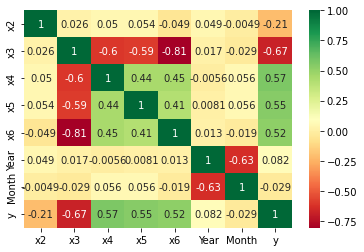

In [17]:

g = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Define x and y

In [18]:
x = final_dataset.iloc[:,:7]
y = final_dataset.iloc[:,7]



In [19]:
x.head()

,x2,x3,x4,x5,x6,Year,Month
0,32.0,84.87882,10,24.98298,121.54024,2012.0,9166667.0
1,19.5,306.59470,9,24.98034,121.53951,2012.0,9166667.0
2,13.3,561.98450,5,24.98746,121.54391,2013.0,5833333.0
3,13.3,561.98450,5,24.98746,121.54391,2013.0,5.0
4,5.0,390.56840,5,24.97937,121.54245,2012.0,8333333.0


In [20]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: y, dtype: float64

**Train the model with all attributes**

Seperate testing dataset and training dataset

In [21]:
from sklearn.model_selection import train_test_split
x_all_train,x_all_test,y_all_train,y_all_test = train_test_split(x,y,test_size=0.33)
x_all_train.shape

(277, 7)

Train the model

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
model.fit(x_all_train,y_all_train)

LinearRegression()

Predict the test data

In [23]:
prediction = model.predict(x_all_test)
prediction

array([49.73972611, 35.72850671, 43.34722512, 53.48999903, 39.04913042,
       44.58008539, 43.24976761, 47.94886025, 11.18466771, 36.06855238,
       32.71468733, 15.92540255, 45.39169226, 13.68376769, 56.74097228,
       54.9750045 ,  9.07431774, 47.41534835, 32.96560392, 40.46255276,
       44.95930342, 39.56349862, 46.79897077, 20.16128717, 24.91737224,
       50.94072969, 41.05932392, 43.24383332, 27.94070386, 26.43830211,
       43.45700482, 31.0997626 , 34.91125034, 49.37552663, 24.38691693,
       39.66981022, 36.21496223, 47.05510622, 35.06110655, 32.49180629,
       32.06081122, 46.10076711, 27.94040556, 55.63406072, 43.21798232,
       33.67134144, 31.04221957, 46.75629213, 31.60349926, 22.17142771,
       44.81407922, 49.17595635, 50.53086768, 12.99492242, 41.50351454,
       44.86552494, 43.48260259, 41.49352553, 49.50931515, 13.93999452,
       48.10049664, 45.96369377, 41.73809283, 31.80296102, 45.20179927,
       50.11634565, 31.84166149, 38.7458693 , 33.64558365, 42.23

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 

mae = mean_absolute_error(y_true=y_all_test,y_pred=prediction)
mse = mean_squared_error(y_true=y_all_test,y_pred=prediction)
rmse = mean_squared_error(y_true=y_all_test,y_pred=prediction,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 5.82484404848898
MSE: 59.738692992263154
RMSE: 7.729080992735369


Calculate the accurracy of the testing data

In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_all_test,prediction)
score

0.6220278809007992

**Feature Importance**

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor()
reg.fit(x,y)
print(reg.feature_importances_)

[0.13261962 0.35894125 0.14357461 0.17964738 0.12531519 0.0175378
 0.04236415]


In [27]:
features = pd.DataFrame({'Features' : x.columns,'Importance' : reg.feature_importances_,})
features.sort_values(by='Importance',inplace=True,ascending=False)
features

,Features,Importance
1,x3,0.358941
3,x5,0.179647
2,x4,0.143575
0,x2,0.132620
4,x6,0.125315
6,Month,0.042364
5,Year,0.017538


**Plot graph of top 5 feature importances for better visualization**

<function matplotlib.pyplot.show(*args, **kw)>

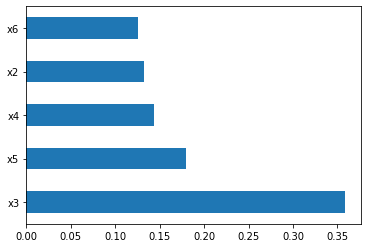

In [28]:
f_importances = pd.Series(reg.feature_importances_, index=x.columns)
f_importances.nlargest(5).plot(kind='barh')
plt.show

**Filter datas from top 5 attributes from calculated feature importances**

In [29]:
top5 = final_dataset[['x3','x5','x4','x6','x2','y']]
top5_x = top5.iloc[:,:5]
top5_y = top5.iloc[:,5]
top5_x.head()
top5_y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: y, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(top5_x,top5_y,test_size=0.2)
x_train.shape

(331, 5)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(x_train,y_train)

LinearRegression()

In [32]:
prediction = model.predict(x_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
 

mae = mean_absolute_error(y_true=y_test,y_pred=prediction)
mse = mean_squared_error(y_true=y_test,y_pred=prediction)
rmse = mean_squared_error(y_true=y_test,y_pred=prediction,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 6.723147174229632
MSE: 75.39803001352462
RMSE: 8.683203902565264
